In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
def Extract_Contour(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel = np.ones((2,2),np.uint8)
    erosion = cv2.erode(gray,kernel,iterations = 2)
    blur = cv2.GaussianBlur(erosion, (5, 5), 0)
    (t, maskLayer) = cv2.threshold(blur, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((2,2),np.uint8)
    dilation = cv2.dilate(maskLayer,kernel,iterations =1)
    blur1 = cv2.GaussianBlur(dilation, (5, 5), 0)
    (t, binary) = cv2.threshold(blur1, 0, 1,  cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros(image.shape, dtype="uint8")
    cv2.drawContours(mask, contours, -1, (0,255,0),15)
    return mask

In [11]:
def Contour_overlay_GT(GT_img, Contour_array, output_path):
    ContourOverGT = cv2.addWeighted(GT_img, 1, Contour_array, 1, 0)
    ContourOverGT = cv2.GaussianBlur(ContourOverGT, (5, 5), 0)
    
    # Save the overlay result to a file
    cv2.imwrite(output_path, cv2.cvtColor(ContourOverGT, cv2.COLOR_RGB2BGR))

    return ContourOverGT

In [12]:
mask_folder = r"F:\UBD_CV\UNET\masks"
output_folder = r"F:\UBD_CV\UNET\mask_overlay"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

mask_files = os.listdir(mask_folder)

for mask_file in mask_files:
    image_path = os.path.join(mask_folder, mask_file)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract contours
    contour_mask = Extract_Contour(image)

    # Overlay contours on the original image
    GT_img = cv2.imread(image_path)
    output_path = os.path.join(output_folder, mask_file)
    overlay_result = Contour_overlay_GT(GT_img, contour_mask, output_path)

In [13]:
OUTPUT_CHANNELS = 3

### Digital Sreeni

In [4]:
from os import listdir
from numpy import asarray, load
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
from matplotlib import pyplot
import numpy as np

In [15]:
from PIL import Image
import os

def process_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)

            # Open the image
            original_image = Image.open(image_path)

            # Create patches
            patches = []
            patch_width, patch_height = 1368, 912
            for i in range(0, original_image.width, patch_width):
                for j in range(0, original_image.height, patch_height):
                    box = (i, j, i + patch_width, j + patch_height)
                    patch = original_image.crop(box)
                    patch_resized = patch.resize((256, 256), Image.LANCZOS)
                    patches.append(patch_resized)

            # Save resized patches and delete the original image
            for idx, patch in enumerate(patches):
                patch.save(os.path.join(folder_path, f"{filename[:-4]}_patch_{idx}.png"))

In [16]:
# Define your folder paths
folder_paths = [
    r"F:\UBD_CV\UNET\data\train\images",
    r"F:\UBD_CV\UNET\data\train\masks",
    r"F:\UBD_CV\UNET\data\test\images",
    r"F:\UBD_CV\UNET\data\test\masks",
    r"F:\UBD_CV\UNET\data\val\images",
    r"F:\UBD_CV\UNET\data\val\masks"
]

# Process each folder
for folder_path in folder_paths:
    process_images(folder_path)

In [3]:
import os
import shutil

pass_1 = 1

def process_folder(folder_path):
    print(f"Processing folder: {folder_path}")
    
    # Get a list of files in the folder
    files = os.listdir(folder_path)
    
    # Iterate through each file in the folder
    for file in files:
        file_path = os.path.join(folder_path, file)
        
        # Check if the file is an image and contains "_patch_" in its name
        if os.path.isfile(file_path) and "_patch_" in file:
            pass_1 = 1
        else:
            try:
                os.remove(file_path)
                print(f"Deleted: {file}")
            except PermissionError:
                print(f"Skipped: {file} (in use by another process)")

def process_folders(folder_paths):
    for folder_path in folder_paths:
        process_folder(folder_path)

# Example usage
folder_paths = [
    r"F:\UBD_CV\UNET\data\train\images",
    r"F:\UBD_CV\UNET\data\train\masks",
    r"F:\UBD_CV\UNET\data\test\images",
    r"F:\UBD_CV\UNET\data\test\masks",
    r"F:\UBD_CV\UNET\data\val\images",
    r"F:\UBD_CV\UNET\data\val\masks"
]
process_folders(folder_paths)

Processing folder: F:\UBD_CV\UNET\data\train\images
Deleted: 1.jpg
Processing folder: F:\UBD_CV\UNET\data\train\masks
Processing folder: F:\UBD_CV\UNET\data\test\images
Processing folder: F:\UBD_CV\UNET\data\test\masks
Processing folder: F:\UBD_CV\UNET\data\val\images
Processing folder: F:\UBD_CV\UNET\data\val\masks


In [5]:
def load_images(path_image, path_mask, size=(256,256)):
    src_list, tar_list = list(), list()
    
    for filename in listdir(path_image):
        pixels = load_img(path_image + filename, target_size=size)

        pixels = img_to_array(pixels)
        sat_img = pixels[:,:256]
        src_list.append(sat_img)

    for filename in listdir(path_mask):
        pixels = load_img(path_mask + filename, target_size=size)

        pixels = img_to_array(pixels)
        tar_img = pixels[:,:256]
        tar_list.append(tar_img)

    return [asarray(src_list), asarray(tar_list)]

In [6]:
path1 = "F:/UBD_CV/UNET/data/train/images/"
path2 = "F:/UBD_CV/UNET/data/train/masks/"

[src_images, tar_images] = load_images(path1, path2)

In [7]:
print('Loaded: ', src_images.shape, tar_images.shape)

Loaded:  (1760, 256, 256, 3) (1760, 256, 256, 3)


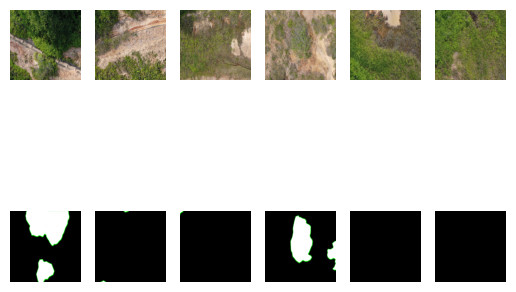

In [8]:
n_samples = 6
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1+i)
    pyplot.axis('off')
    pyplot.imshow(src_images[i].astype('uint8'))

for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1+n_samples+i)
    pyplot.axis('off')
    pyplot.imshow(tar_images[i].astype('uint8'))

pyplot.show()

In [30]:
# https://youtu.be/UcHe0xiuvpg
# https://youtu.be/6pUSZgPJ3Yg
# https://youtu.be/my7LEgYTJto
"""
pix2pix GAN model

Based on the code by Jason Brownlee from his blogs on https://machinelearningmastery.com/
I seriously urge everyone to foloow his blogs and get enlightened. 
I am adapting his code to various applications but original credit goes to Jason.


    Original paper: https://arxiv.org/pdf/1611.07004.pdf
    Github for original paper: https://phillipi.github.io/pix2pix/
    

Generator:    
The encoder-decoder architecture consists of:
encoder:
C64-C128-C256-C512-C512-C512-C512-C512
decoder:
CD512-CD512-CD512-C512-C256-C128-C64


Discriminator
C64-C128-C256-C512
After the last layer, a convolution is applied to map to
a 1-dimensional output, followed by a Sigmoid function.    
"""
# 
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model


#############################################################################
#Define generator, discriminator, gan and other helper functions
#We will use functional way of defining model and not sequential
#as we have multiple inputs; both images and corresponding labels. 
########################################################################

#Since pix2pix is a conditional GAN, it takes 2 inputs - image and corresponding label
#For pix2pix the label will be another image. 

# define the standalone discriminator model
#Given an input image, the Discriminator outputs the likelihood of the image being real.
    #Binary classification - true or false (1 or 0). So using sigmoid activation.
#Think of discriminator as a binary classifier that is classifying images as real/fake.

# From the paper C64-C128-C256-C512
#After the last layer, conv to 1-dimensional output, followed by a Sigmoid function.  

def define_discriminator(image_shape):
    
	# weight initialization
	init = RandomNormal(stddev=0.02) #As described in the original paper
    
	# source image input
	in_src_image = Input(shape=image_shape)  #Image we want to convert to another image
	# target image input
	in_target_image = Input(shape=image_shape)  #Image we want to generate after training. 
    
	# concatenate images, channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
    
	# C64: 4x4 kernel Stride 2x2
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128: 4x4 kernel Stride 2x2
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256: 4x4 kernel Stride 2x2
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512: 4x4 kernel Stride 2x2 
    # Not in the original paper. Comment this block if you want.
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer : 4x4 kernel but Stride 1x1
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
    #The model is trained with a batch size of one image and Adam opt. 
    #with a small learning rate and 0.5 beta. 
    #The loss for the discriminator is weighted by 50% for each model update.
    
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0,1.0])
	#model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# disc_model = define_discriminator((256,256,3))
# plot_model(disc_model, to_file='disc_model.png', show_shapes=True)

##############################
#Now define the generator - in our case we will define a U-net
# define an encoder block to be used in generator
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block to be used in generator
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

# define the standalone generator model - U-net
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model: C64-C128-C256-C512-C512-C512-C512-C512
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model: CD512-CD512-CD512-C512-C256-C128-C64
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(image_shape[2], (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7) #Modified 
	out_image = Activation('tanh')(g)  #Generates images in the range -1 to 1. So change inputs also to -1 to 1
	# define model
	model = Model(in_image, out_image)
	return model

# gen_model = define_generator((256,256,3))
# plot_model(gen_model, to_file='gen_model.png', show_shapes=True)


# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False       #Descriminator layers set to untrainable in the combined GAN but 
                                                #standalone descriminator will be trainable.
            
	# define the source image
	in_src = Input(shape=image_shape)
	# suppy the image as input to the generator 
	gen_out = g_model(in_src)
	# supply the input image and generated image as inputs to the discriminator
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and disc. output as outputs
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
    
    #Total loss is the weighted sum of adversarial loss (BCE) and L1 loss (MAE)
    #Authors suggested weighting BCE vs L1 as 1:100.
	#model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

# generate samples and save as a plot and save the model
#GAN models do not converge, we just want to find a good balance between
#the generator and the discriminator. Therefore, it makes sense to periodically
#save the generator model and check how good the generated image looks. 
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	for i in range(n_samples):
		plt.subplot(3, n_samples, 1 + i)
		plt.axis('off')
		plt.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		plt.subplot(3, n_samples, 1 + n_samples + i)
		plt.axis('off')
		plt.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		plt.subplot(3, n_samples, 1 + n_samples*2 + i)
		plt.axis('off')
		plt.imshow(X_realB[i])
	# save plot to file
	filename1 = 'plot_%06d.png' % (step+1)
	plt.savefig(filename1)
	plt.close()
	# save the generator model
	filename2 = 'model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

# train pix2pix models
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		# summarize model performance
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model, dataset)


In [31]:
image_shape = src_images.shape[1:]
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
gan_model = define_gan(g_model, d_model, image_shape)


c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


data = [src_images, tar_images]

def preprocess_data(data):
    X1, X2 = data[0], data[1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

dataset = preprocess_data(data)

In [32]:
from datetime import datetime
start1 = datetime.now()

In [33]:
train(d_model, g_model, gan_model, dataset, n_epochs=10, n_batch=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


ValueError: When there is only a single output, the `loss_weights` argument must be a Python float. Received instead: loss_weights=[0, 1.0] of type <class 'list'>

# CODE 2

In [68]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import PIL
from IPython.display import clear_output
import glob
import os
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [69]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4189935545271521765
xla_global_id: -1
]


In [70]:
tf.__version__

'2.16.0-rc0'

In [71]:
BUFFER_SIZE = 2000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [72]:
def Prepare_dataset(Dataset_dir):
    
    SB_dir = os.path.join(Dataset_dir, 'images/') #Satellite Bilder path
    GT_dir = os.path.join(Dataset_dir, 'masks/')# Ground Truths path


    
    SB_listnames=glob.glob(SB_dir+"*.png")#Satellite Bilder filenames
    GT_listnames=glob.glob(GT_dir+"*.png")# Ground Truths filenames
    
    GT_listnames.sort()
    SB_listnames.sort()
    
    print("Image Directory:",SB_dir)
    print('Images Ground Truths:',len(SB_listnames))
    print("") 
    print("Ground Truths Directory:",GT_dir)
    print('Images satellien Bilder:',len(GT_listnames))

    print("*********************************************") 
    return SB_dir,GT_dir,SB_listnames,GT_listnames

In [73]:
def Extract_Contour(image):

    # Load an color image in grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


    
    kernel = np.ones((2,2),np.uint8)
    erosion = cv2.erode(gray,kernel,iterations = 2)


    blur = cv2.GaussianBlur(erosion, (5, 5), 0)
    (t, maskLayer) = cv2.threshold(blur, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)



    kernel = np.ones((2,2),np.uint8)
    dilation = cv2.dilate(maskLayer,kernel,iterations =1)


    blur1 = cv2.GaussianBlur(dilation, (5, 5), 0)
    (t, binary) = cv2.threshold(blur1, 0, 1,  cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

    (_, contours, _) = cv2.findContours(binary, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
    #print(contours)
    mask = np.zeros(image.shape, dtype="uint8")
    cv2.drawContours(mask, contours, -1, (0,255,0),7)


    return mask

In [74]:
def Contour_overlay_GT(GT_img,Contour_array):
    
    #ContourOverGT = cv2.bitwise_or(GT_img, Contour_array)
    ContourOverGT=cv2.addWeighted(GT_img,1,Contour_array,1,0)
    #ContourOverSB = cv2.bitwise_or(GT_img, )

    ContourOverGT = cv2.GaussianBlur(ContourOverGT, (5, 5), 0)

    
    return ContourOverGT

In [75]:
def load_image(SB_path,GT_path, is_train,return_name):

       
    #SB_path=str(SB_path).split("'")[1]
    SB_img =cv2.imread(SB_path)
    SB_img= cv2.cvtColor(SB_img,cv2.COLOR_BGR2RGB)

    #GT_path=str(GT_path).split("'")[1]
    GT_img =cv2.imread(GT_path)
    GT_img= cv2.cvtColor(GT_img,cv2.COLOR_BGR2RGB)



    Contour=Extract_Contour(GT_img)
    ContourOverGT=Contour_overlay_GT(GT_img,Contour)

    if is_train:        
        if np.random.random() > 0.5:
     # random mirroring
            SB_img = cv2.flip( SB_img, -1);
            ContourOverGT = cv2.flip( ContourOverGT, -1);


    SB_img = (SB_img / 127.5) -1
    ContourOverGT = (ContourOverGT / 127.5) - 1

    SB_img=SB_img.astype("float32")
    ContourOverGT=ContourOverGT.astype("float32")

    if return_name:
            return SB_img,ContourOverGT,GT_path
        

    return SB_img,ContourOverGT

In [76]:
Train_Dataset_dir="F:/UBD_CV/UNET/data/train/"
Valid_Dataset_dir="F:/UBD_CV/UNET/data/val/"
Test_Dataset_dir="F:/UBD_CV/UNET/data/test/"

In [77]:
Train_SB_dir,Train_GT_dir,SB_Train_listnames,GT_Train_listnames=Prepare_dataset(Train_Dataset_dir)
Valid_SB_dir,Valid_GT_dir,SB_Valid_listnames,GT_Valid_listnames=Prepare_dataset(Valid_Dataset_dir)
Test_SB_dir,Test_GT_dir,SB_Test_listnames,GT_Test_listnames=Prepare_dataset(Test_Dataset_dir)

Image Directory: F:/UBD_CV/UNET/data/train/images/
Images Ground Truths: 1760

Ground Truths Directory: F:/UBD_CV/UNET/data/train/masks/
Images satellien Bilder: 1760
*********************************************
Image Directory: F:/UBD_CV/UNET/data/val/images/
Images Ground Truths: 80

Ground Truths Directory: F:/UBD_CV/UNET/data/val/masks/
Images satellien Bilder: 80
*********************************************
Image Directory: F:/UBD_CV/UNET/data/test/images/
Images Ground Truths: 80

Ground Truths Directory: F:/UBD_CV/UNET/data/test/masks/
Images satellien Bilder: 80
*********************************************


In [79]:
SB_dataset_train = tf.data.Dataset.from_tensor_slices(SB_Train_listnames)
GT_dataset_train = tf.data.Dataset.from_tensor_slices(GT_Train_listnames)
train_dataset=tf.data.Dataset.zip((SB_dataset_train,GT_dataset_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.map(lambda x,y: tf.py_function(load_image, [x, y,True,False], [tf.float32,tf.float32]),num_parallel_calls=4)
train_dataset = train_dataset.batch(1)

In [80]:
SB_dataset_valid = tf.data.Dataset.from_tensor_slices(SB_Valid_listnames)
GT_dataset_valid = tf.data.Dataset.from_tensor_slices(GT_Valid_listnames)
valid_dataset=tf.data.Dataset.zip((SB_dataset_valid,GT_dataset_valid))
valid_dataset = valid_dataset.shuffle(BUFFER_SIZE)

valid_dataset = valid_dataset.map(lambda x, y: tf.py_function(load_image, [x, y,True,False], [tf.float32,tf.float32]), num_parallel_calls=4)
valid_dataset = valid_dataset.batch(1)

In [81]:
SB_dataset_test = tf.data.Dataset.from_tensor_slices(SB_Test_listnames)
GT_dataset_test = tf.data.Dataset.from_tensor_slices(GT_Test_listnames)
test_dataset=tf.data.Dataset.zip((SB_dataset_test,GT_dataset_test))
test_dataset = test_dataset.shuffle(BUFFER_SIZE)

test_dataset = test_dataset.map(lambda x, y: tf.py_function(load_image, [x, y,False,True], [tf.float32,tf.float32,tf.string]), num_parallel_calls=4)
test_dataset = test_dataset.batch(1)

In [86]:
OUTPUT_CHANNELS = 3

In [88]:
class Downsample(tf.keras.Model):
    def __init__(self, filters, size, apply_batchnorm=True):
        super(Downsample, self).__init__()
        self.apply_batchnorm = apply_batchnorm
        initializer = tf.random_normal_initializer(0., 0.02)

        self.conv1 = tf.keras.layers.Conv2D(filters, 
                                        (size, size), 
                                        strides=2, 
                                        padding='same',
                                        kernel_initializer=initializer,
                                        use_bias=False)
        if self.apply_batchnorm:
            self.batchnorm = tf.keras.layers.BatchNormalization()
  
    def call(self, x, training):
        x = self.conv1(x)
        if self.apply_batchnorm:
            x = self.batchnorm(x, training=training)
        x = tf.nn.leaky_relu(x)
        return x 


class Upsample(tf.keras.Model):
    def __init__(self, filters, size, apply_dropout=False):
        super(Upsample, self).__init__()
        self.apply_dropout = apply_dropout
        initializer = tf.random_normal_initializer(0., 0.02)

        self.up_conv = tf.keras.layers.Conv2DTranspose(filters, 
                                                   (size, size), 
                                                   strides=2, 
                                                   padding='same',
                                                   kernel_initializer=initializer,
                                                   use_bias=False)
        self.batchnorm = tf.keras.layers.BatchNormalization()
        if self.apply_dropout:            
            self.dropout = tf.keras.layers.Dropout(0.5)

    def call(self, x1, x2, training):
        x = self.up_conv(x1)
        x = self.batchnorm(x, training=training)
        if self.apply_dropout:
            x = self.dropout(x, training=training)
        x = tf.nn.relu(x)
        x = tf.concat([x, x2], axis=-1)
        return x


class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator, self).__init__()
        initializer = tf.random_normal_initializer(0., 0.02)
    
        self.down1 = Downsample(64, 4, apply_batchnorm=False)
        self.down2 = Downsample(128, 4)
        self.down3 = Downsample(256, 4)
        self.down4 = Downsample(512, 4)
        self.down5 = Downsample(512, 4)
        self.down6 = Downsample(512, 4)
        self.down7 = Downsample(512, 4)
        self.down8 = Downsample(512, 4)

        self.up1 = Upsample(512, 4, apply_dropout=True)
        self.up2 = Upsample(512, 4, apply_dropout=True)
        self.up3 = Upsample(512, 4, apply_dropout=True)
        self.up4 = Upsample(512, 4)
        self.up5 = Upsample(256, 4)
        self.up6 = Upsample(128, 4)
        self.up7 = Upsample(64, 4)

        self.last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 
                                                (4, 4), 
                                                strides=2, 
                                                padding='same',
                                                kernel_initializer=initializer)
  
    @tf.function
    def call(self, x, training):
        # x shape == (bs, 256, 256, 3)    
        x1 = self.down1(x, training=training) # (bs, 128, 128, 64)
        x2 = self.down2(x1, training=training) # (bs, 64, 64, 128)
        x3 = self.down3(x2, training=training) # (bs, 32, 32, 256)
        x4 = self.down4(x3, training=training) # (bs, 16, 16, 512)
        x5 = self.down5(x4, training=training) # (bs, 8, 8, 512)
        x6 = self.down6(x5, training=training) # (bs, 4, 4, 512)
        x7 = self.down7(x6, training=training) # (bs, 2, 2, 512)
        x8 = self.down8(x7, training=training) # (bs, 1, 1, 512)

        x9 = self.up1(x8, x7, training=training) # (bs, 2, 2, 1024)
        x10 = self.up2(x9, x6, training=training) # (bs, 4, 4, 1024)
        x11 = self.up3(x10, x5, training=training) # (bs, 8, 8, 1024)
        x12 = self.up4(x11, x4, training=training) # (bs, 16, 16, 1024)
        x13 = self.up5(x12, x3, training=training) # (bs, 32, 32, 512)
        x14 = self.up6(x13, x2, training=training) # (bs, 64, 64, 256)
        x15 = self.up7(x14, x1, training=training) # (bs, 128, 128, 128)

        x16 = self.last(x15) # (bs, 256, 256, 3)
        x16 = tf.nn.tanh(x16)

        return x16
class DiscDownsample(tf.keras.Model):
    def __init__(self, filters, size, apply_batchnorm=True):
        super(DiscDownsample, self).__init__()
        self.apply_batchnorm = apply_batchnorm
        initializer = tf.random_normal_initializer(0., 0.02)

        self.conv1 = tf.keras.layers.Conv2D(filters, 
                                        (size, size), 
                                        strides=2, 
                                        padding='same',
                                        kernel_initializer=initializer,
                                        use_bias=False)
        if self.apply_batchnorm:
            self.batchnorm = tf.keras.layers.BatchNormalization()
  
    def call(self, x, training):
        x = self.conv1(x)
        if self.apply_batchnorm:
            x = self.batchnorm(x, training=training)
        x = tf.nn.leaky_relu(x)
        return x 

class Discriminator(tf.keras.Model):
    
    def __init__(self):
        super(Discriminator, self).__init__()
        initializer = tf.random_normal_initializer(0., 0.02)
    
        self.down1 = DiscDownsample(64, 4, False)
        self.down2 = DiscDownsample(128, 4)
        self.down3 = DiscDownsample(256, 4)
    
    # we are zero padding here with 1 because we need our shape to 
    # go from (batch_size, 32, 32, 256) to (batch_size, 31, 31, 512)
        self.zero_pad1 = tf.keras.layers.ZeroPadding2D()
        self.conv = tf.keras.layers.Conv2D(512, 
                                       (4, 4), 
                                       strides=1, 
                                       kernel_initializer=initializer, 
                                       use_bias=False)
        self.batchnorm1 = tf.keras.layers.BatchNormalization()
    
    # shape change from (batch_size, 31, 31, 512) to (batch_size, 30, 30, 1)
        self.zero_pad2 = tf.keras.layers.ZeroPadding2D()
        self.last = tf.keras.layers.Conv2D(1, 
                                       (4, 4), 
                                       strides=1,
                                       kernel_initializer=initializer)
  
    @tf.function
    def call(self, inp, tar, training):
        # concatenating the input and the target
        x = tf.concat([inp, tar], axis=-1) # (bs, 256, 256, channels*2)
        x = self.down1(x, training=training) # (bs, 128, 128, 64)
        x = self.down2(x, training=training) # (bs, 64, 64, 128)
        x = self.down3(x, training=training) # (bs, 32, 32, 256)

        x = self.zero_pad1(x) # (bs, 34, 34, 256)
        x = self.conv(x)      # (bs, 31, 31, 512)
        x = self.batchnorm1(x, training=training)
        x = tf.nn.leaky_relu(x)
    
        x = self.zero_pad2(x) # (bs, 33, 33, 512)
        # don't add a sigmoid activation here since
        # the loss function expects raw logits.
        x = self.last(x)      # (bs, cen, 30, 1 )

        return x


In [89]:
generator = Generator()
discriminator = Discriminator()

In [90]:
LAMBDA = 100

In [91]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = tf.losses.sigmoid_cross_entropy(multi_class_labels = tf.ones_like(disc_real_output), 
                                              logits = disc_real_output)
    generated_loss = tf.losses.sigmoid_cross_entropy(multi_class_labels = tf.zeros_like(disc_generated_output), 
                                                   logits = disc_generated_output)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss

In [92]:
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = tf.losses.sigmoid_cross_entropy(multi_class_labels = tf.ones_like(disc_generated_output),
                                             logits = disc_generated_output) 
  # mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss

In [100]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

ValueError: `Checkpoint` was expecting discriminator_optimizer to be a trackable object (an object derived from `Trackable`), got <keras.src.optimizers.adam.Adam object at 0x000001C5BCF57560>. If you believe this object should be trackable (i.e. it is part of the TensorFlow Python API and manages state), please open an issue.

# CODE 3

In [5]:
import torch
import torch.nn as nn
from tqdm.auto import tqdm

from torchvision.utils import make_grid



import numpy as np
import os
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import models, transforms, datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
class DownSample(nn.Module):
    def __init__(self, Input_Channels, Output_Channels):
        super(DownSample, self).__init__()
        # nn.Conv2d(in_channel, out_channel, kernel, stride, padding)
        self.model = nn.Sequential(
                     nn.Conv2d(Input_Channels, Output_Channels, 4, 2, 1, bias=False),
                     nn.LeakyReLU(0.2)
                     )

    def forward(self, x):
        down = self.model(x)
        return down


class Upsample(nn.Module):
    def __init__(self, Input_Channels, Output_Channels):
        super(Upsample, self).__init__()
        
        self.model = nn.Sequential( 
                     nn.ConvTranspose2d(Input_Channels, Output_Channels, 4, 2, 1, bias=False),
                     nn.InstanceNorm2d(Output_Channels),
                     nn.ReLU(inplace=True),)

    def forward(self, x, skip_input):
        x = self.model(x)
        x = torch.cat((x, skip_input), 1)
        return x


class Generator(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super(Generator, self).__init__()

        self.down1 = DownSample(in_channels, 64)
        self.down2 = DownSample(64, 128)
        self.down3 = DownSample(128, 256)
        self.down4 = DownSample(256, 512)
        self.down5 = DownSample(512, 512)
        self.down6 = DownSample(512, 512)
        self.down7 = DownSample(512, 512)
        self.down8 = DownSample(512, 512)

        self.up1 = Upsample(512, 512)
        self.up2 = Upsample(1024, 512)
        self.up3 = Upsample(1024, 512)
        self.up4 = Upsample(1024, 512)
        self.up5 = Upsample(1024, 256)
        self.up6 = Upsample(512, 128)
        self.up7 = Upsample(256, 64)

        self.final = nn.Sequential(
            nn.Upsample(scale_factor=2),
            nn.ZeroPad2d((1, 0, 1, 0)),
            nn.Conv2d(128, 3, 4, padding=1), # out_channels
            nn.Tanh(),
        )

    def forward(self, x):
        # U-Net generator with skip connections from encoder to decoder

        d1 = self.down1(x)
        d2 = self.down2(d1)
        d3 = self.down3(d2)
        d4 = self.down4(d3)
        d5 = self.down5(d4)
        d6 = self.down6(d5)
        d7 = self.down7(d6)
        d8 = self.down8(d7)
        u1 = self.up1(d8, d7)
        u2 = self.up2(u1, d6)
        u3 = self.up3(u2, d5)
        u4 = self.up4(u3, d4)
        u5 = self.up5(u4, d3)
        u6 = self.up6(u5, d2)
        u7 = self.up7(u6, d1)
        u8 = self.final(u7)
        return u8

In [7]:
class Discriminator(nn.Module):
    def __init__(self, in_channels=3,):
        super(Discriminator, self).__init__()

        
        self.model = nn.Sequential(
                     nn.Conv2d(6, 64, 4, 2, 1, bias=False),
                     nn.LeakyReLU(0.2, inplace=True),

                     nn.Conv2d(64, 128, 4, 2, 1, bias=False),
                     nn.LeakyReLU(0.2, inplace=True),

                     nn.Conv2d(128, 256, 4, 2, 1, bias=False),
                     nn.LeakyReLU(0.2, inplace=True),

                     nn.Conv2d(256, 512, 4, 2, 1, bias=False),
                     nn.LeakyReLU(0.2, inplace=True),

                     nn.ZeroPad2d((1, 0, 1, 0)),
                     nn.Conv2d(512, 1, 4, padding=1, bias=False)
                     
                     )

        
    def forward(self, img_A, img_B):
        # Here we are concatenating the images on their channels
        img_input = torch.cat((img_A, img_B), 1)
        return self.model(img_input)

In [8]:
image = torch.rand((1,3,256,256))
out_channels = 3
generator = Generator()
k = generator(image)
print(k.shape)

torch.Size([1, 3, 256, 256])


In [9]:
image1 = torch.rand((1,3,256,256))
image2 = torch.rand((1,3,256,256))

out_channels = 3
discriminator = Discriminator()
k = discriminator(image1,image2)
print(k.shape)

torch.Size([1, 1, 16, 16])


In [10]:
from PIL import Image
import os

def merge_images(folder1, folder2, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file1 in os.listdir(folder1):
        file2_path = os.path.join(folder2, file1)
        if os.path.isfile(file2_path):
            file1_path = os.path.join(folder1, file1)

            image1 = Image.open(file1_path)
            image2 = Image.open(file2_path)

            # Ensure both images have the same size
            if image1.size[1] == image2.size[1]:
                # Create a new image with a width of 512 and height of 256
                new_image = Image.new('RGB', (image1.size[0] + image2.size[0], image1.size[1]))

                # Paste the images side by side
                new_image.paste(image1, (0, 0))
                new_image.paste(image2, (image1.size[0], 0))

                # Save the new image to the output folder
                output_path = os.path.join(output_folder, file1)
                new_image.save(output_path)

# Example usage
folder1 = "F:/UBD_CV/UNET/data/train/images"
folder2 = "F:/UBD_CV/UNET/data/train/masks"
output_folder_1 = "F:/UBD_CV/UNET/train"
merge_images(folder1, folder2, output_folder_1)

folder3 = "F:/UBD_CV/UNET/data/val/images"
folder4 = "F:/UBD_CV/UNET/data/val/masks"
output_folder = "F:/UBD_CV/UNET/val"
merge_images(folder3, folder4, output_folder)


In [11]:
data_dir = "F:/UBD_CV/UNET/data_1"

data_transform = transforms.Compose([
    transforms.Resize((256, 512)),
    transforms.CenterCrop((256, 512)),
    # transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

dataset_train = datasets.ImageFolder(root=os.path.join(data_dir, "train_!"), transform=data_transform)
dataset_val = datasets.ImageFolder(root=os.path.join(data_dir, "val_!"), transform=data_transform)

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=24, shuffle=True, num_workers=2)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=24, shuffle=True, num_workers=2)

In [12]:
print(len(dataset_train))
print(len(dataset_val))

1760
80


In [13]:
def print_images(image_tensor, num_images):
    
    images = DeNormalize(image_tensor)
    images = images.detach().cpu()
    image_grid = make_grid(images[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [14]:
images,_ = next(iter(dataloader_train))
images.shape

torch.Size([24, 3, 256, 512])

In [15]:
Normalization_Values = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
def DeNormalize(tensor_of_image):
  return tensor_of_image * Normalization_Values[1][0] + Normalization_Values[0][0]

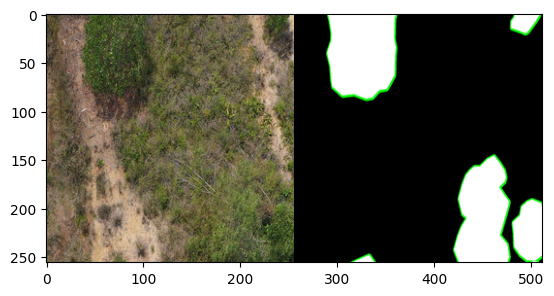

In [134]:
images,_ = next(iter(dataloader_train))

for image in images:  
  plt.imshow(DeNormalize(image).permute(1,2,0))
  plt.show()
  break;

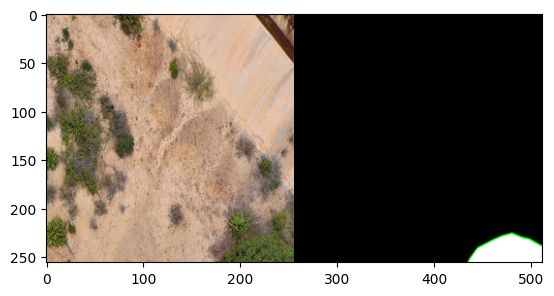

In [135]:
images,_ = next(iter(dataloader_train))

plt.imshow(DeNormalize(images[5]).permute(1,2,0))
plt.show()

In [16]:
loss_comparison = nn.BCEWithLogitsLoss() 
L1_loss = nn.L1Loss()

In [17]:
def discriminator_training(inputs,targets,discriminator_opt):     

        discriminator_opt.zero_grad()
        
       
        # Passing real image and getting loss
        
        output = discriminator(inputs, targets) 
        label = torch.ones(size = output.shape, dtype=torch.float, device=device)
        
        real_loss = loss_comparison(output, label) 
        
        # Passing Generated image and getting loss
        
        gen_image = generator(inputs).detach()
         
        fake_output = discriminator(inputs, gen_image)
        fake_label = torch.zeros(size = fake_output.shape, dtype=torch.float, device=device) 
        
        fake_loss = loss_comparison(fake_output, fake_label)

        Total_loss = (real_loss + fake_loss)/2

        Total_loss.backward()
        
        discriminator_opt.step()

        return Total_loss

In [18]:

def generator_training(inputs,targets, generator_opt, L1_lambda):
          
            generator_opt.zero_grad()
            
            generated_image = generator(inputs)
            
            disc_output = discriminator(inputs, generated_image)
            desired_output = torch.ones(size = disc_output.shape, dtype=torch.float, device=device)
            
            generator_loss = loss_comparison(disc_output, desired_output) + L1_lambda * torch.abs(generated_image-targets).sum()
            generator_loss.backward()
            generator_opt.step()

            return generator_loss, generated_image

In [19]:
L1_lambda = 100
NUM_EPOCHS= 100
lr=0.0002 
beta1=0.5
beta2=0.999
device = 'cpu'

In [20]:
discriminator_opt = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))
generator_opt = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))

discriminator = discriminator.to(device)
generator = generator.to(device)

In [21]:
for epoch in range(NUM_EPOCHS+1):
    print(f"Training epoch {epoch+1}")
    for images,_ in tqdm(dataloader_train):
       # Splitting the image 

       inputs = images[:,:,:,:256].to(device)
       targets = images[:,:,:,256:].to(device)

       # Train Discriminator

       Disc_Loss = discriminator_training(inputs,targets,discriminator_opt)

       # Train Geneerator
       for i in range(2):
            Gen_Loss, generator_image = generator_training(inputs,targets, generator_opt, L1_lambda)

    if (epoch % 5) == 0:
         print_images(inputs,5)
         print_images(generator_image,5)
         print_images(targets,5)

Training epoch 1


  0%|          | 0/74 [00:15<?, ?it/s]